    **Superstore Sales Forecasting with SARIMA**

In [1]:
# Import necessary libraries for data manipulation, numerical operations, and visualization
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress specific warnings that might clutter output
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from the specified CSV file path
data= pd.read_csv(r'C:\Users\Olga\Desktop\save in one\Sample - Superstore.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
# Convert 'Order Date' and 'Ship Date' columns to datetime objects for time series analysis
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

In [4]:
# Import Additional Time Series Tools
from itertools import combinations
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: Sales, dtype: float64

Временной ряд содержит 48 наблюдений.


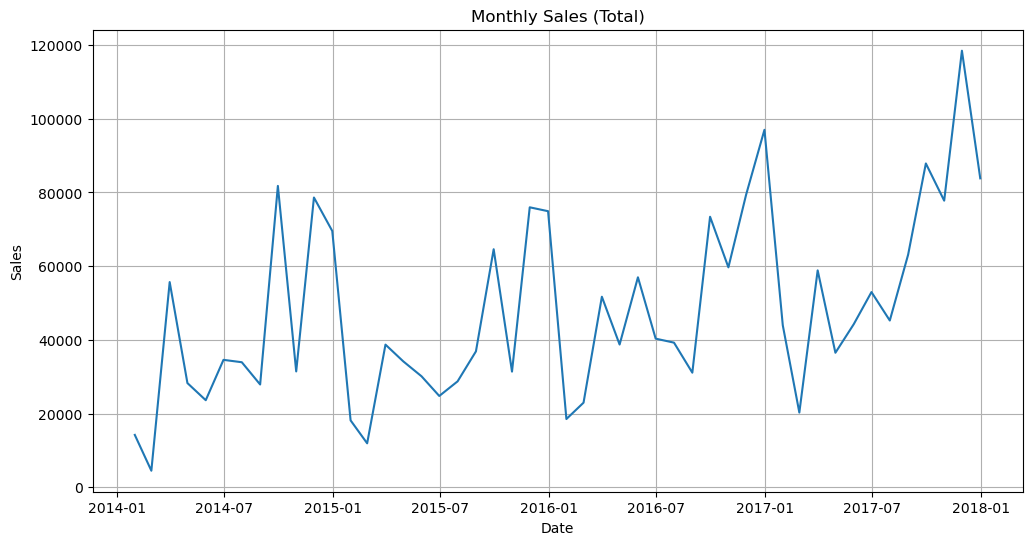

In [5]:
# Sort by date (good practice)
data = data.sort_values('Order Date')

# Set 'Order Date' as the index
data.set_index('Order Date', inplace=True)

# Aggregate sales by month ('M')
ts_sales = data['Sales'].resample('M').sum() 

print(ts_sales.head())
print(f"\nВременной ряд содержит {len(ts_sales)} наблюдений.")

ts_sales = ts_sales.fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(ts_sales)
plt.title('Monthly Sales (Total)') # Changed title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [6]:
#Prepare Monthly Sales Time Series (Mean Monthly Sales)

daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')

monthly_sales = daily_sales.set_index('Order Date').resample('ME').mean()

monthly_sales.head()

,Sales
Order Date,
2014-01-31,647.131591
2014-02-28,225.994600
2014-03-31,2320.458708
2014-04-30,1178.972708
2014-05-31,844.581679


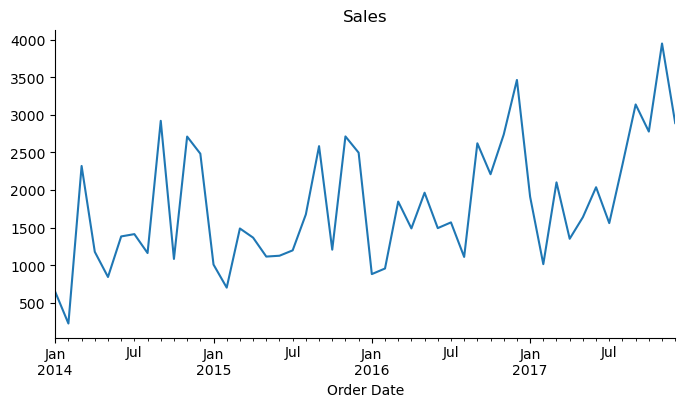

In [7]:
from matplotlib import pyplot as plt
monthly_sales['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

Seasonal Decomposition

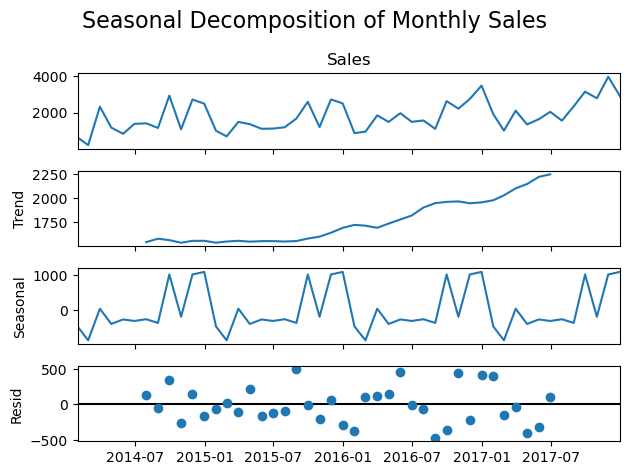

In [8]:
result = seasonal_decompose(monthly_sales['Sales'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()

Import SARIMA and Evaluation Libraries

In [9]:
!pip install pmdarima


In [10]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pmdarima as pm

Check for Stationarity (ADF Test)

In [11]:
from statsmodels.tsa.stattools import adfuller
# Check for Stationarity (ADF Test)
result = adfuller(ts_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758


Plot ACF and PACF

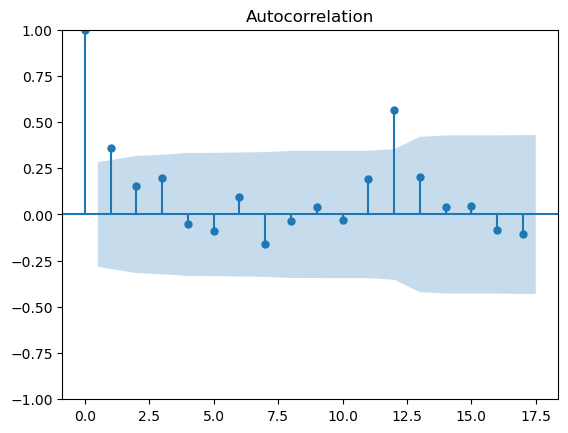

In [12]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ts_sales);

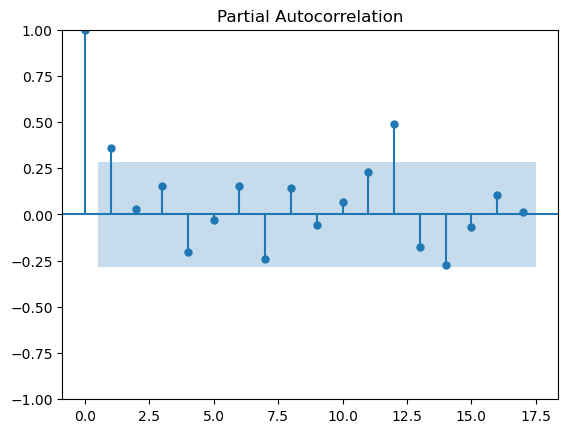

In [13]:
sm.graphics.tsa.plot_pacf(ts_sales);

Automatic SARIMA Model Selection (auto_arima)

In [14]:
stepwise_model = auto_arima(ts_sales,m=12,seasonal=True,trace=True,
                            error_action='ignore')
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.882, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1098.402, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1077.114, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1078.127, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1096.548, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1091.142, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.911, Time=0.13 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1079.082, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1081.816, Time=0.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1080.489, Time=0.34 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.759, Time=0.05 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.411, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.909, Time=0.03 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.137, Time=0.21 sec
 ARIMA(2,1,0)(1,0,1

Train/Test Split, Model Fitting, and Forecasting

In [15]:
train = ts_sales[:-6]
test = ts_sales[-7:]

model = SARIMAX(train, 
                order=stepwise_model.order,
                seasonal_order=stepwise_model.seasonal_order)

results = model.fit()
forecast = results.forecast(steps=6)
new_point_forecast = pd.Series([results.fittedvalues.values[-1]], index=[pd.to_datetime(results.fittedvalues.index[-1])])
forecast = pd.concat([new_point_forecast, forecast])


 Plot Training Fit and Forecast vs Actual (Full View)

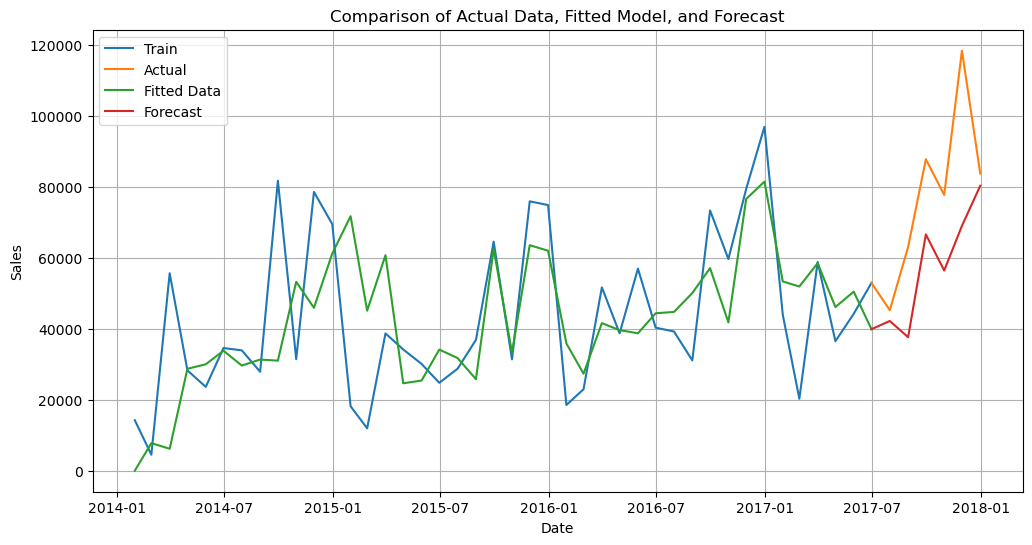

In [16]:
plt.figure(figsize=(12,6))

# Plot the training data
plt.plot(train.index, train, label='Train')

# Plot the actual test data
plt.plot(test.index, test, label='Actual')

# Plot the fitted values on the training data
plt.plot(train.index, results.fittedvalues, label="Fitted Data")

# Plot the forecasted values
plt.plot(forecast.index, forecast, label='Forecast')

plt.title('Comparison of Actual Data, Fitted Model, and Forecast') # Added title for clarity
plt.xlabel('Date') # Added X-axis label
plt.ylabel('Sales') # Added Y-axis label
plt.legend()
plt.grid(True) # Added grid for readability
plt.show()

Plot Forecast vs Actual (Zoomed View)

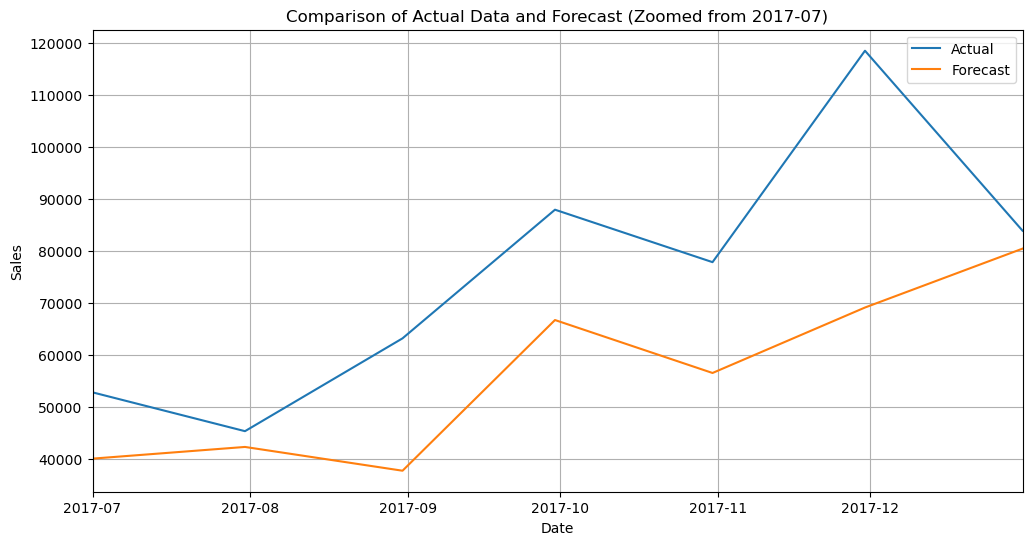

In [17]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual')
# Plot the forecast values created earlier
plt.plot(forecast.index, forecast, label='Forecast')

# --- Set X-axis limits for zoomed view ---
# Specify the start date for the zoomed plot
start_date = pd.to_datetime('2017-07-01')
# End date can be set automatically or explicitly (e.g., max date of test set)
end_date = test.index.max() # Or forecast.index.max()

plt.xlim(left=start_date, right=end_date)

plt.title('Comparison of Actual Data and Forecast (Zoomed from 2017-07)') # Updated title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Calculate Evaluation Metrics (MAE, RMSE)

In [18]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 19566.09
RMSE: 24452.47


# --- SARIMA Forecasting by Region ---

In [19]:
# Step 1: Aggregate Sales by Region and Month
# First, aggregate daily sales by Region and Order Date
daily_region_sales = data.groupby(['Region', 'Order Date'])['Sales'].sum().reset_index()

# Set Order Date as index for resampling per region
daily_region_sales = daily_region_sales.set_index('Order Date')

# Get unique regions
regions = daily_region_sales['Region'].unique()

# Define the number of months to forecast (next year)
forecast_months = 12

print("Starting SARIMA forecasting for each region...")


Starting SARIMA forecasting for each region...



--- Processing region: Central ---
Best SARIMA parameters for Central: (0, 0, 0)x(0, 0, 1)[12]


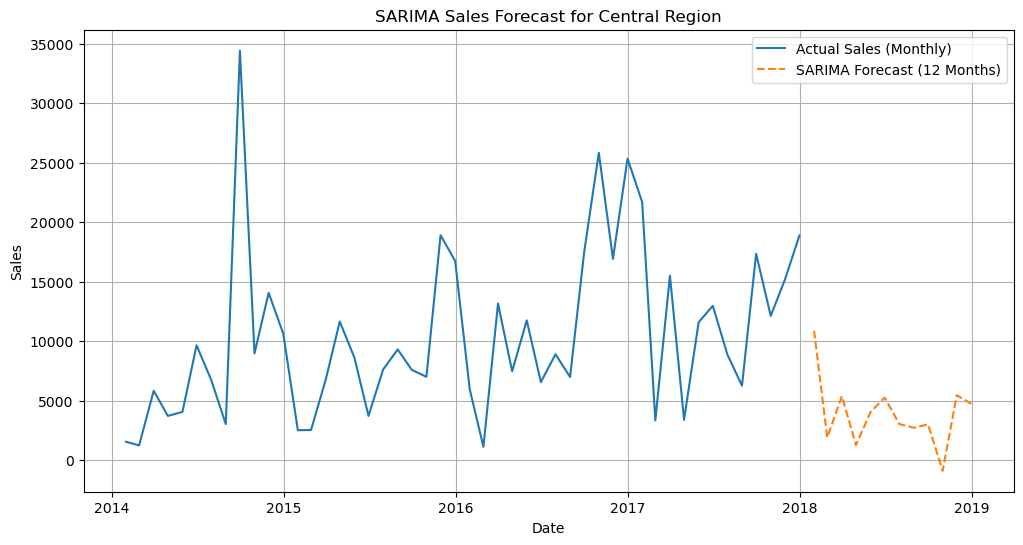


--- Processing region: East ---
Best SARIMA parameters for East: (0, 0, 1)x(0, 0, 2)[12]


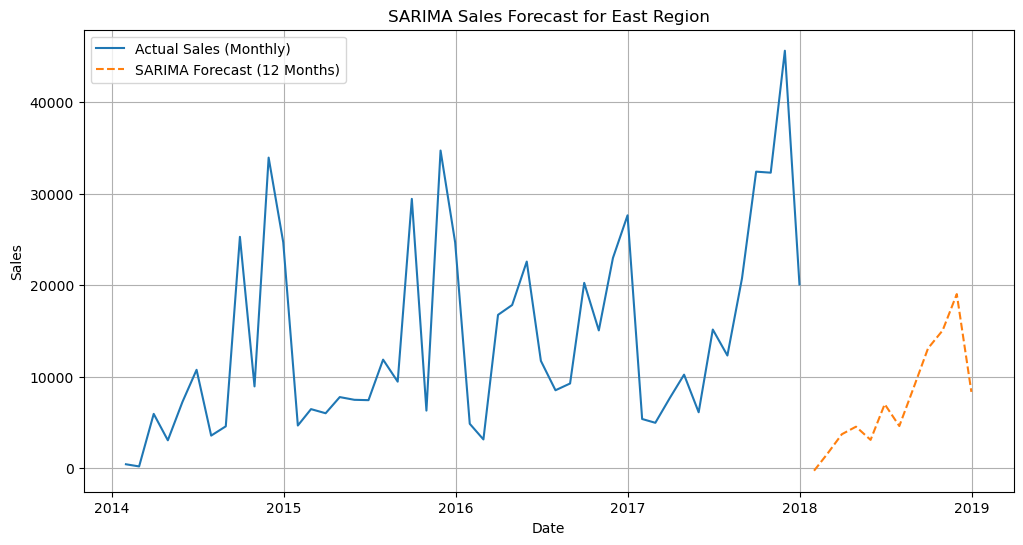


--- Processing region: South ---
Best SARIMA parameters for South: (0, 0, 0)x(0, 0, 1)[12]


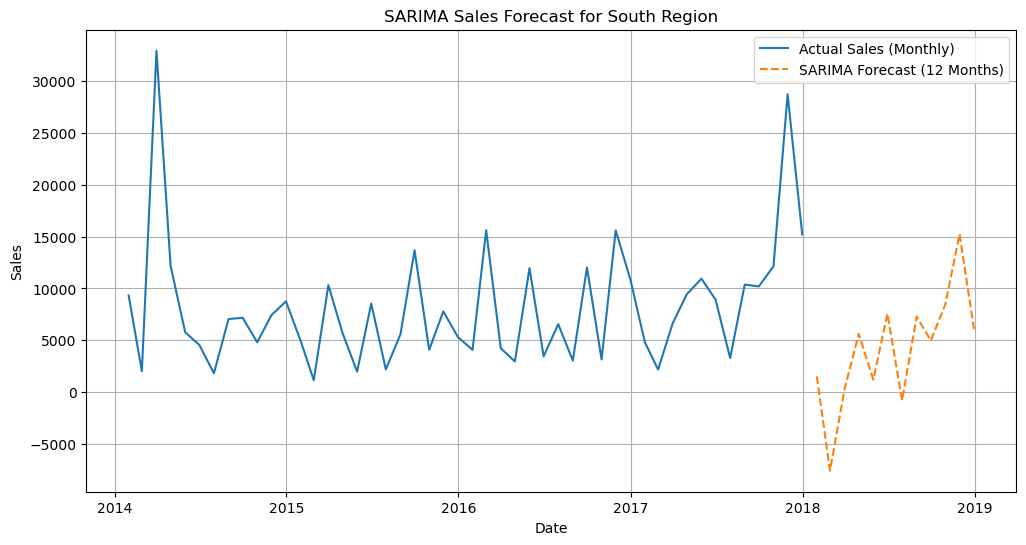


--- Processing region: West ---
Best SARIMA parameters for West: (0, 1, 1)x(1, 0, 0)[12]


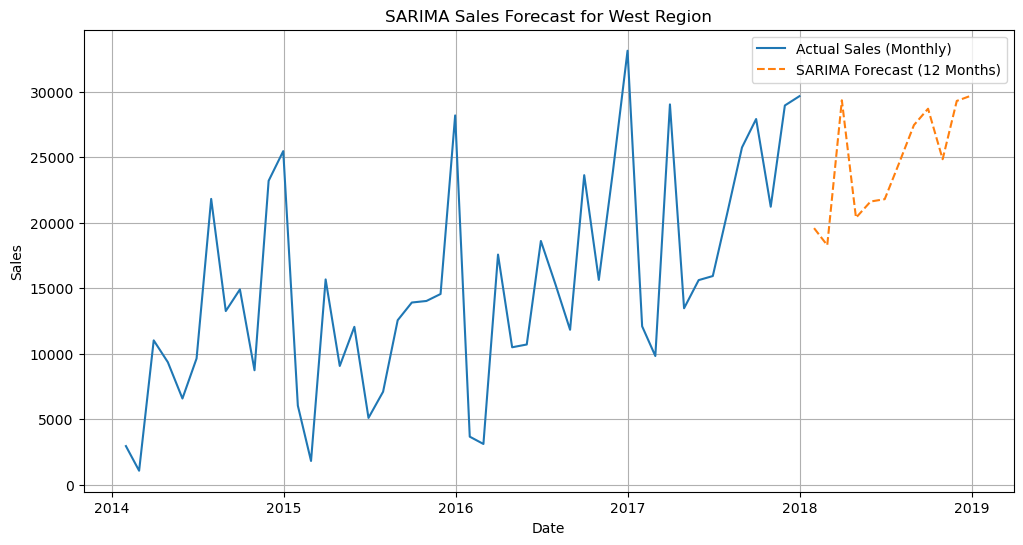


SARIMA forecasting by region completed.


In [20]:
# Step 2: Loop Through Each Region, Model, and Forecast
for region in regions:
    print(f"\n--- Processing region: {region} ---")

    # Filter data for the current region and aggregate to monthly sum
    region_data = daily_region_sales[daily_region_sales['Region'] == region].copy()
    # Resample to monthly sum (Month End frequency)
    # Note: 'M' frequency is deprecated, 'ME' (Month End) is preferred
    monthly_region_ts = region_data['Sales'].resample('ME').sum()

    # --- SARIMA Modeling ---
    # Use auto_arima to find the best SARIMA parameters for this region
    # m=12 for monthly seasonality
    # trace=False to keep output clean unless debugging a specific region
    # error_action='ignore' to skip models that don't fit
    # suppress_warnings=True to hide warnings from auto_arima
    try:
        stepwise_model = auto_arima(monthly_region_ts,
                                    m=12,
                                    seasonal=True,
                                    stepwise=True,
                                    trace=False,
                                    error_action='ignore',
                                    suppress_warnings=True)

        print(f"Best SARIMA parameters for {region}: {stepwise_model.order}x{stepwise_model.seasonal_order[0:3]}[{stepwise_model.seasonal_order[3]}]")

        # Fit the final SARIMA model to the FULL monthly data for this region
        # Using the parameters found by auto_arima
        model_fit = SARIMAX(monthly_region_ts,
                            order=stepwise_model.order,
                            seasonal_order=stepwise_model.seasonal_order)

        results = model_fit.fit() # <-- Check this line and the one above carefully
 # --- Forecasting ---
        # Get the last date in the current region's data
        last_date = monthly_region_ts.index.max()
        # Create a future index for the next 12 months
        # pd.date_range generates (start, ..., end), so we take periods+1 and slice
        future_dates = pd.date_range(start=last_date, periods=forecast_months + 1, freq='ME')[1:] # Get dates *after* last date

        # Generate forecast using the fitted model
        # Specify the start and end dates from the future_dates index
        forecast_sarima = results.predict(start=future_dates[0], end=future_dates[-1])

        # --- Visualization ---
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_region_ts.index, monthly_region_ts, label='Actual Sales (Monthly)')
        plt.plot(forecast_sarima.index, forecast_sarima, label=f'SARIMA Forecast ({forecast_months} Months)', linestyle='--')
        plt.title(f'SARIMA Sales Forecast for {region} Region')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Could not fit or forecast SARIMA for {region}: {e}")
        # Plot the original data even if forecasting failed
        plt.figure(figsize=(12, 3))
        plt.plot(monthly_region_ts.index, monthly_region_ts, label='Actual Sales (Monthly)')
        plt.title(f'SARIMA Forecasting Failed for {region} Region')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        # Add error text to the plot
        plt.text(0.5, 0.5, f'Error: {e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')
        plt.show()


print("\nSARIMA forecasting by region completed.")
       

In [34]:
!pip install streamlit numpy matplotlib seaborn pyngrok -q

In [ ]:
def forecast_prophet_city(city_data_prophet_input, city_name, forecast_months):
    """Performs Prophet forecasting for a single city and plots the results."""
    st.subheader(f"Prophet Forecast for {city_name} City")

    try:
        # Prophet works best on daily data, so use the daily aggregation directly
        # Check if there's enough data points for Prophet (Prophet generally needs > ~20-30 points)
         if len(city_data_prophet_input) < 30:
             st.warning(f"Skipping Prophet for {city_name}: Insufficient daily data ({len(city_data_prophet_input)} points)")
             return

         # --- Prophet Modeling ---
         # Create and train the Prophet model on the FULL daily data for this region
         prophet_model_region = Prophet(
             yearly_seasonality=True,  # Explicitly enable yearly seasonality
             weekly_seasonality=True,  # Explicitly enable weekly seasonality (if daily data)
             daily_seasonality=False # Often set to False for daily data unless you have sub-daily patterns
             # You could also add holidays here if you have a list of relevant dates
         )

         # Use try-except for the fit process as well
         try:
              prophet_model_region.fit(city_data_prophet_input)

              # --- Forecasting ---
              # Create a future dataframe for the next 'forecast_months'
              # Prophet's make_future_dataframe uses the frequency of the input data by default
              # We want monthly steps *for the forecast length*, so we specify freq='ME'
              future_prophet = prophet_model_region.make_future_dataframe(
                  periods=forecast_months,
                  freq='ME' # Request monthly steps for the forecast
                  # Note: Prophet fits on daily data but aggregates predictions to the requested frequency
              )

              # Generate forecast using the fitted Prophet model
              forecast_prophet = prophet_model_region.predict(future_prophet)

              # --- Visualization ---
              # Prophet's plot function works directly with the original data and the forecast dataframe
              fig = prophet_model_region.plot(forecast_prophet)
              plt.title(f'Prophet Sales Forecast for {city_name} City')
              plt.xlabel('Date')
              plt.ylabel('Sales')
              st.pyplot(fig) # Use st.pyplot to display the figure
              plt.close(fig) # Close the figure

              # Plot the forecast components (optional, but useful)
              fig2 = prophet_model_region.plot_components(forecast_prophet)
              st.pyplot(fig2)
              plt.close(fig2)

         except Exception as e:
              st.error(f"Prophet Fit or Forecast Failed for {city_name}: {e}")
              # Optional: plot the original data even if forecasting failed
              fig = plt.figure(figsize=(12, 6))
              plt.plot(city_data_prophet_input['ds'], city_data_prophet_input['y'], label='Actual Sales (Daily)')
              plt.title(f'Prophet Forecasting Failed for {city_name} City')
              plt.xlabel('Date')
              plt.ylabel('Sales')
              plt.legend()
              plt.grid(True)
              plt.text(0.5, 0.5, f'Error: {e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')
              st.pyplot(fig)
              plt.close(fig)


    except Exception as e:
         st.error(f"Prophet Model Initialization Failed for {city_name}: {e}")
         # No plot available if initialization fails
